In [1]:
import pandas as pd

X_train=pd.read_csv('pre_processed1.csv')

In [2]:
no_of_metros_dict = dict()

no_of_metros_dict['Astoria']=8
no_of_metros_dict['Battery Park City'] = 1
no_of_metros_dict['Financial District']= 11
no_of_metros_dict['Bushwick'] = 16
no_of_metros_dict['Boerum Hill'] = 3 
no_of_metros_dict['Ridgewood'] = 5
no_of_metros_dict['Chinatown'] = 2
no_of_metros_dict['Lower East Side'] = 5
no_of_metros_dict['Little Italy'] = 2
no_of_metros_dict['Tribeca'] = 4
no_of_metros_dict['Civic Center'] = 4
no_of_metros_dict['Canarsie'] = 2
no_of_metros_dict['Carroll Gardens'] = 2
no_of_metros_dict['Chelsea'] = 6
no_of_metros_dict['Union Square'] = 1
no_of_metros_dict['West Village'] = 2
no_of_metros_dict['Greenwich Village'] = 4 
no_of_metros_dict['Midtown'] = 25 
no_of_metros_dict['Crown Heights']= 5
no_of_metros_dict['Concourse Village'] = 1
no_of_metros_dict['East Flatbush'] = 4 
no_of_metros_dict['Upper East Side'] = 8
no_of_metros_dict['East Harlem'] = 4
no_of_metros_dict['East Village'] = 3
no_of_metros_dict['Elmhurst'] = 6
no_of_metros_dict['Williamsburg']= 12
no_of_metros_dict['Flatbush'] = 5
no_of_metros_dict['Flushing'] = 1
no_of_metros_dict['Forest Hills'] = 4 
no_of_metros_dict['Clinton Hill'] = 3
no_of_metros_dict['Fort Greene']= 4
no_of_metros_dict['Greenpoint'] = 2
no_of_metros_dict['Hudson Square'] = 3
no_of_metros_dict['Hamilton Heights'] = 3
no_of_metros_dict['Morningside Heights'] = 1
no_of_metros_dict['Washington Heights'] = 8
no_of_metros_dict['Upper West Side'] = 8
no_of_metros_dict['Flatlands'] = 1
no_of_metros_dict['Times Square'] = 6 
no_of_metros_dict['Inwood'] = 3
no_of_metros_dict['Jackson Heights']= 4
no_of_metros_dict['Jamaica'] = 1 
no_of_metros_dict['Murray Hill'] = 1
no_of_metros_dict['Long Island City'] = 4
no_of_metros_dict['Mott Haven'] = 7
no_of_metros_dict['Marble Hill']= 1
no_of_metros_dict['Prospect Heights'] = 3
no_of_metros_dict['Rego Park'] = 1
no_of_metros_dict['Roosevelt Island'] = 1
no_of_metros_dict['Sunnyside'] = 2
no_of_metros_dict['Woodside'] = 4
no_of_metros_dict['Yorkville'] = 2
no_of_metros_dict['Bensonhurst'] = 12
no_of_metros_dict['Brighton Beach'] = 1
no_of_metros_dict['Brooklyn Heights'] = 5
no_of_metros_dict['Richmond Hill'] = 3
no_of_metros_dict['Park Slope'] = 7
no_of_metros_dict['Sheepshead Bay'] = 3
no_of_metros_dict['Ozone Park'] = 5
no_of_metros_dict['Red Hook'] = 1
no_of_metros_dict['Bay Ridge'] = 4
no_of_metros_dict['Riverdale'] = 1
no_of_metros_dict['Bath Beach'] = 2
no_of_metros_dict['New Brighton'] = 1
no_of_metros_dict['Fort Hamilton'] = 1
no_of_metros_dict['Bayside'] = 1
no_of_metros_dict['East New York'] = 10

In [3]:
X_train.dropna(how='any',inplace=True)

In [4]:
X_train['property_type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Condominium', 'Loft', 'Other',
       'Bed & Breakfast', 'Dorm', 'Cabin', 'Villa', 'Hut', 'Boat',
       'Plane', 'Treehouse', 'Bungalow', 'Entire Floor', 'Tent',
       'Timeshare', 'Boutique hotel', 'Guesthouse', 'Serviced apartment',
       'Hostel', 'Island', 'Lighthouse', 'Earth House', 'Chalet',
       'Camper/RV', 'Castle', 'Vacation home'], dtype=object)

In [5]:
diff_prop_train=['Plane', 'Treehouse', 'Hut', 'Entire Floor', 'Chalet', 'Island','Castle','Boat','Earth House']
X_train = X_train[~X_train['property_type'].isin(diff_prop_train)]

In [6]:
X_train.drop(columns=['accommodates','name','id'],inplace=True)

In [7]:
X_train.shape

(231591, 13)

In [8]:
#removing dollar sign from price
import re

def removedollar(row):
    return float(re.sub('[$]', '', row['price']).replace(',',''))

X_train['price'] = X_train.apply(lambda row: removedollar(row),axis=1)

In [9]:
from geopy.distance import vincenty
def distance_from_center(row):
    if row['Bourough'] == 'Manhattan':
        center=(40.7589,73.9851)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Brooklyn':
        center=(40.665996, 73.931966)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Queens':
        center=(40.624625, 73.806706)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Bronx':
        center=(40.8506, 73.8770)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Staten Island':
        center=(40.6148, 74.1767)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    
X_train['Distance_from_center'] = X_train.apply (lambda row: distance_from_center(row),axis=1)

In [10]:

X_train.drop(columns=['longitude','latitude'],inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
X_train.head()

,bathrooms,bedrooms,beds,city,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center
0,1.0,1.0,1.0,New York,Astoria,15.0,26,35.0,House,Private room,Queens,11.685941
1,1.0,1.0,1.0,New York,Astoria,11.0,15,35.0,House,Private room,Queens,11.658803
2,1.0,1.0,1.0,New York,Astoria,11.0,15,35.0,House,Private room,Queens,11.748286
3,1.0,2.0,2.0,New York,Astoria,7.0,0,200.0,Apartment,Entire home/apt,Queens,11.704019
4,1.0,2.0,2.0,New York,Bedford Park,12.0,4,120.0,Townhouse,Entire home/apt,Bronx,1.369860


In [13]:
diff=['Van Nest', 'Westerleigh', 'Tompkinsville', 'Bedford Park', 'Parkchester', 'Graniteville', 'DUMBO', 'Port Morris', 'Kingsbridge Heights', 'Bergen Beach']

X_train = X_train[~X_train['neighbourhood'].isin(diff)]

In [14]:
def metros(row):
    s=row['neighbourhood']
    return no_of_metros_dict[s]

X_train['No_Metro_Stations'] = X_train.apply (lambda row: metros(row),axis=1)

In [15]:
X_train['neighbourhood'].unique()

array(['Astoria', 'Battery Park City', 'Financial District', 'Bushwick',
       'Boerum Hill', 'Ridgewood', 'Chinatown', 'Lower East Side',
       'Little Italy', 'Tribeca', 'Civic Center', 'Canarsie',
       'Carroll Gardens', 'Chelsea', 'Union Square', 'West Village',
       'Greenwich Village', 'Midtown', 'Crown Heights',
       'Concourse Village', 'East Flatbush', 'Upper East Side',
       'East Harlem', 'East Village', 'Elmhurst', 'Williamsburg',
       'Flatbush', 'Flushing', 'Forest Hills', 'Clinton Hill',
       'Fort Greene', 'Greenpoint', 'Hudson Square', 'Hamilton Heights',
       'Morningside Heights', 'Washington Heights', 'Upper West Side',
       'Flatlands', 'Times Square', 'Inwood', 'Jackson Heights',
       'Jamaica', 'Murray Hill', 'Long Island City', 'Mott Haven',
       'Marble Hill', 'Prospect Heights', 'Rego Park', 'Roosevelt Island',
       'Sunnyside', 'Woodside', 'Yorkville', 'Bensonhurst',
       'Brighton Beach', 'Brooklyn Heights', 'Richmond Hill',
       

In [16]:
# one_hot2=pd.get_dummies(X_train['property_type'], prefix='prop',drop_first=True)
# X_train=X_train.join(one_hot2)

labelencoder_X_3 = LabelEncoder()
X_train['property_type'] = labelencoder_X_3.fit_transform(X_train['property_type'])
X_train.head()

,bathrooms,bedrooms,beds,city,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,New York,Astoria,15.0,26,35.0,10,Private room,Queens,11.685941,8
1,1.0,1.0,1.0,New York,Astoria,11.0,15,35.0,10,Private room,Queens,11.658803,8
2,1.0,1.0,1.0,New York,Astoria,11.0,15,35.0,10,Private room,Queens,11.748286,8
3,1.0,2.0,2.0,New York,Astoria,7.0,0,200.0,0,Entire home/apt,Queens,11.704019,8
5,1.0,1.0,1.0,New York,Astoria,11.0,34,39.0,0,Shared room,Queens,11.679008,8


In [17]:
# labelencoder_X_2 = LabelEncoder()
# X_train['property_type'] = labelencoder_X_2.fit_transform(X_train['property_type'])
# X_train.head()
labelencoder_X_3 = LabelEncoder()
X_train['neighbourhood'] = labelencoder_X_3.fit_transform(X_train['neighbourhood'])
X_train.head()

,bathrooms,bedrooms,beds,city,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,New York,0,15.0,26,35.0,10,Private room,Queens,11.685941,8
1,1.0,1.0,1.0,New York,0,11.0,15,35.0,10,Private room,Queens,11.658803,8
2,1.0,1.0,1.0,New York,0,11.0,15,35.0,10,Private room,Queens,11.748286,8
3,1.0,2.0,2.0,New York,0,7.0,0,200.0,0,Entire home/apt,Queens,11.704019,8
5,1.0,1.0,1.0,New York,0,11.0,34,39.0,0,Shared room,Queens,11.679008,8


In [18]:
X_train.shape

(231547, 13)

In [19]:
labelencoder_X_3 = LabelEncoder()
X_train['room_type'] = labelencoder_X_3.fit_transform(X_train['room_type'])
X_train.head()

,bathrooms,bedrooms,beds,city,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,New York,0,15.0,26,35.0,10,1,Queens,11.685941,8
1,1.0,1.0,1.0,New York,0,11.0,15,35.0,10,1,Queens,11.658803,8
2,1.0,1.0,1.0,New York,0,11.0,15,35.0,10,1,Queens,11.748286,8
3,1.0,2.0,2.0,New York,0,7.0,0,200.0,0,0,Queens,11.704019,8
5,1.0,1.0,1.0,New York,0,11.0,34,39.0,0,2,Queens,11.679008,8


In [20]:
X_train.drop(columns=['city',],inplace=True)

In [21]:
X_train.head()

,bathrooms,bedrooms,beds,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,0,15.0,26,35.0,10,1,Queens,11.685941,8
1,1.0,1.0,1.0,0,11.0,15,35.0,10,1,Queens,11.658803,8
2,1.0,1.0,1.0,0,11.0,15,35.0,10,1,Queens,11.748286,8
3,1.0,2.0,2.0,0,7.0,0,200.0,0,0,Queens,11.704019,8
5,1.0,1.0,1.0,0,11.0,34,39.0,0,2,Queens,11.679008,8


In [22]:
# one_hot=pd.get_dummies(X_train['neighbourhood'], prefix='neigh',drop_first=True)
# X_train=X_train.join(one_hot)

labelencoder_X_3 = LabelEncoder()
X_train['Bourough'] = labelencoder_X_3.fit_transform(X_train['Bourough'])
X_train.head()

,bathrooms,bedrooms,beds,neighbourhood,no_of_amenities,number_of_reviews,price,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,0,15.0,26,35.0,10,1,3,11.685941,8
1,1.0,1.0,1.0,0,11.0,15,35.0,10,1,3,11.658803,8
2,1.0,1.0,1.0,0,11.0,15,35.0,10,1,3,11.748286,8
3,1.0,2.0,2.0,0,7.0,0,200.0,0,0,3,11.704019,8
5,1.0,1.0,1.0,0,11.0,34,39.0,0,2,3,11.679008,8


In [23]:
# X_train.drop(columns=['neighbourhood'],inplace=True)
X_train=X_train[X_train.price <= 3000]

Y_train=pd.DataFrame(X_train['price'])
X_train.drop(columns=['price'],inplace=True)

In [24]:
X_train.corr()

,bathrooms,bedrooms,beds,neighbourhood,no_of_amenities,number_of_reviews,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
bathrooms,1.000000,0.430010,0.398848,0.009179,0.148131,-0.019834,0.187765,-0.035766,-0.012857,-0.034214,0.038359
bedrooms,0.430010,1.000000,0.616673,-0.019136,0.109168,0.014289,0.116998,-0.069808,-0.000057,0.056978,-0.031455
beds,0.398848,0.616673,1.000000,0.008858,0.176579,0.048632,0.152605,-0.265689,-0.023751,-0.021592,0.051043
neighbourhood,0.009179,-0.019136,0.008858,1.000000,-0.004570,-0.053257,-0.028947,-0.039809,-0.041521,0.024309,0.230195
no_of_amenities,0.148131,0.109168,0.176579,-0.004570,1.000000,0.083428,0.070585,-0.067973,0.000648,-0.029802,0.093901
number_of_reviews,-0.019834,0.014289,0.048632,-0.053257,0.083428,1.000000,0.033374,0.020860,-0.005706,-0.024018,-0.028990
property_type,0.187765,0.116998,0.152605,-0.028947,0.070585,0.033374,1.000000,0.015666,0.012112,0.015275,0.021261
room_type,-0.035766,-0.069808,-0.265689,-0.039809,-0.067973,0.020860,0.015666,1.000000,0.014258,0.234642,-0.018564
Bourough,-0.012857,-0.000057,-0.023751,-0.041521,0.000648,-0.005706,0.012112,0.014258,1.000000,0.207335,-0.016805
Distance_from_center,-0.034214,0.056978,-0.021592,0.024309,-0.029802,-0.024018,0.015275,0.234642,0.207335,1.000000,-0.150829


In [25]:
Y_train.shape

(231402, 1)

In [26]:
X_train.shape

(231402, 11)

In [27]:
#testing
X_test=pd.read_csv('test_Preprocessed_Data.csv')
X_test=X_test[X_test.city == 'New York']
X_test.head()

,id,name,city,neighbourhood,property_type,accommodates,room_type,bathrooms,bedrooms,beds,number_of_reviews,latitude,longitude,price,no_of_amenities
30,8391132,NYC La Guardia Master Room,New York,Astoria,House,2,Private room,1.0,1.0,1.0,60,40.772291,-73.916279,$55.00,21
33,18861274,Sunny Astoria apartment by the park,New York,NaN,Apartment,2,Private room,1.0,1.0,1.0,3,40.781536,-73.913207,$61.00,15
56,11098211,Lovely warm place in New York City,New York,Ditmars / Steinway,Apartment,2,Entire home/apt,1.0,1.0,1.0,2,40.777399,-73.910789,$165.00,14
61,3499016,House 1 Bed $100/ night per person,New York,NaN,House,1,Private room,1.0,1.0,1.0,2,40.779017,-73.907677,$100.00,15
71,6398715,Studio!Astoria station in 3min!,New York,Ditmars / Steinway,Apartment,1,Private room,1.0,1.0,1.0,0,40.779148,-73.909022,$44.00,4


In [28]:
X_test.dropna(how='any',inplace=True)

In [29]:
X_test.dropna(how='any',inplace=True)

In [30]:
bou=pd.read_csv('data/Prob Stats Project - Sheet1.csv')
brooklyn_list=bou['Brooklyn']
manhattan_list=bou['Manhattan']
queens_list=bou['Queens']
bronx_list=bou['Bronx']
staten_island_list=bou['Staten Island']

def bourough(row):
    if row['neighbourhood'] in list(manhattan_list):
        return 'Manhattan'
    elif row['neighbourhood'] in list(queens_list):
        return 'Queens'
    elif row['neighbourhood'] in list(brooklyn_list):
        return 'Brooklyn'
    elif row['neighbourhood'] in list(bronx_list):
        return 'Bronx'
    elif row['neighbourhood'] in list(staten_island_list):
        return 'Staten Island'
    else:
        return 'Delete'    
    
X_test['Bourough'] = X_test.apply(lambda row: bourough(row),axis=1)
X_test=X_test[X_test.Bourough !='Delete']

In [31]:
from geopy.distance import vincenty
def distance_from_center(row):
    if row['Bourough'] == 'Manhattan':
        center=(40.7589,73.9851)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Brooklyn':
        center=(40.665996, 73.931966)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Queens':
        center=(40.624625, 73.806706)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Bronx':
        center=(40.8506, 73.8770)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    elif row['Bourough'] == 'Staten Island':
        center=(40.6148, 74.1767)
        location=(row['latitude'],-row['longitude'])
        return vincenty(center, location).miles
    
X_test['Distance_from_center'] = X_test.apply (lambda row: distance_from_center(row),axis=1)

In [32]:
X_test.head()

,id,name,city,neighbourhood,property_type,accommodates,room_type,bathrooms,bedrooms,beds,number_of_reviews,latitude,longitude,price,no_of_amenities,Bourough,Distance_from_center
30,8391132,NYC La Guardia Master Room,New York,Astoria,House,2,Private room,1.0,1.0,1.0,60,40.772291,-73.916279,$55.00,21,Queens,11.701910
174,8507328,"MIDTOWN, MANHATTAN,COLONIAL,ROOM",New York,Astoria,House,1,Private room,1.0,1.0,1.0,42,40.772592,-73.914590,$48.00,21,Queens,11.676679
176,8444555,NYC Astoria affordable private room,New York,Astoria,House,1,Private room,1.0,1.0,1.0,59,40.773717,-73.914502,$47.00,21,Queens,11.742389
231,4357134,Beautiful NY Gem,New York,Astoria,Apartment,4,Entire home/apt,1.0,2.0,2.0,0,40.771715,-73.917688,$200.00,7,Queens,11.704019
289,8392760,NYC Near to Midtown Manhattan Sunny Private Room,New York,Astoria,House,1,Private room,1.0,1.0,1.0,81,40.772697,-73.915826,$50.00,21,Queens,11.714633


In [33]:
X_test.drop(columns=['accommodates','city','name','id'],inplace=True)

In [34]:
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,latitude,longitude,price,no_of_amenities,Bourough,Distance_from_center
30,Astoria,House,Private room,1.0,1.0,1.0,60,40.772291,-73.916279,$55.00,21,Queens,11.701910
174,Astoria,House,Private room,1.0,1.0,1.0,42,40.772592,-73.914590,$48.00,21,Queens,11.676679
176,Astoria,House,Private room,1.0,1.0,1.0,59,40.773717,-73.914502,$47.00,21,Queens,11.742389
231,Astoria,Apartment,Entire home/apt,1.0,2.0,2.0,0,40.771715,-73.917688,$200.00,7,Queens,11.704019
289,Astoria,House,Private room,1.0,1.0,1.0,81,40.772697,-73.915826,$50.00,21,Queens,11.714633


In [35]:
X_test.drop(columns=['latitude','longitude'],inplace=True)

In [36]:
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center
30,Astoria,House,Private room,1.0,1.0,1.0,60,$55.00,21,Queens,11.701910
174,Astoria,House,Private room,1.0,1.0,1.0,42,$48.00,21,Queens,11.676679
176,Astoria,House,Private room,1.0,1.0,1.0,59,$47.00,21,Queens,11.742389
231,Astoria,Apartment,Entire home/apt,1.0,2.0,2.0,0,$200.00,7,Queens,11.704019
289,Astoria,House,Private room,1.0,1.0,1.0,81,$50.00,21,Queens,11.714633


In [38]:
labelencoder_X_2 = LabelEncoder()
X_test['property_type'] = labelencoder_X_2.fit_transform(X_test['property_type'])
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center
30,Astoria,11,Private room,1.0,1.0,1.0,60,$55.00,21,Queens,11.701910
174,Astoria,11,Private room,1.0,1.0,1.0,42,$48.00,21,Queens,11.676679
176,Astoria,11,Private room,1.0,1.0,1.0,59,$47.00,21,Queens,11.742389
231,Astoria,0,Entire home/apt,1.0,2.0,2.0,0,$200.00,7,Queens,11.704019
289,Astoria,11,Private room,1.0,1.0,1.0,81,$50.00,21,Queens,11.714633


In [39]:
labelencoder_X_3 = LabelEncoder()
X_test['room_type'] = labelencoder_X_3.fit_transform(X_test['room_type'])
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center
30,Astoria,11,1,1.0,1.0,1.0,60,$55.00,21,Queens,11.701910
174,Astoria,11,1,1.0,1.0,1.0,42,$48.00,21,Queens,11.676679
176,Astoria,11,1,1.0,1.0,1.0,59,$47.00,21,Queens,11.742389
231,Astoria,0,0,1.0,2.0,2.0,0,$200.00,7,Queens,11.704019
289,Astoria,11,1,1.0,1.0,1.0,81,$50.00,21,Queens,11.714633


In [40]:
# X_test.drop(columns=['Bourough'],inplace=True)

In [41]:
X_test['price'] = X_test.apply(lambda row: removedollar(row),axis=1)

In [42]:
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center
30,Astoria,11,1,1.0,1.0,1.0,60,55.0,21,Queens,11.701910
174,Astoria,11,1,1.0,1.0,1.0,42,48.0,21,Queens,11.676679
176,Astoria,11,1,1.0,1.0,1.0,59,47.0,21,Queens,11.742389
231,Astoria,0,0,1.0,2.0,2.0,0,200.0,7,Queens,11.704019
289,Astoria,11,1,1.0,1.0,1.0,81,50.0,21,Queens,11.714633


In [43]:
diff_prop_test=['Guest suite']
X_test = X_test[~X_test['property_type'].isin(diff_prop_test)]

In [44]:
diff_test=['Glendale', 'University Heights', 'Midwood', 'Utopia', 'Brownsville', 'Howard Beach', 'Belmont', 'St. George', 'Gravesend', 'Kensington', 'Morris Heights', 'Maspeth', 'Sunset Park', 'Concourse', 'Kingsbridge', 'Arrochar', 'Morrisania', 'Stapleton']

X_test = X_test[~X_test['neighbourhood'].isin(diff_test)]

In [45]:
X_test['No_Metro_Stations'] = X_test.apply(lambda row: metros(row),axis=1)

labelencoder_X_3 = LabelEncoder()
X_test['neighbourhood'] = labelencoder_X_3.fit_transform(X_test['neighbourhood'])
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center,No_Metro_Stations
30,0,11,1,1.0,1.0,1.0,60,55.0,21,Queens,11.701910,8
174,0,11,1,1.0,1.0,1.0,42,48.0,21,Queens,11.676679,8
176,0,11,1,1.0,1.0,1.0,59,47.0,21,Queens,11.742389,8
231,0,0,0,1.0,2.0,2.0,0,200.0,7,Queens,11.704019,8
289,0,11,1,1.0,1.0,1.0,81,50.0,21,Queens,11.714633,8


In [47]:
# X_test.drop(columns=['neighbourhood'],inplace=True)
labelencoder_X_3 = LabelEncoder()
X_test['Bourough'] = labelencoder_X_3.fit_transform(X_test['Bourough'])
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,price,no_of_amenities,Bourough,Distance_from_center,No_Metro_Stations
30,0,11,1,1.0,1.0,1.0,60,55.0,21,3,11.701910,8
174,0,11,1,1.0,1.0,1.0,42,48.0,21,3,11.676679,8
176,0,11,1,1.0,1.0,1.0,59,47.0,21,3,11.742389,8
231,0,0,0,1.0,2.0,2.0,0,200.0,7,3,11.704019,8
289,0,11,1,1.0,1.0,1.0,81,50.0,21,3,11.714633,8


In [50]:
# one_hot2=pd.get_dummies(X_test['property_type'], prefix='prop',drop_first=True)
# X_test=X_test.join(one_hot2)

X_test=X_test[X_test.price <= 3000]

In [51]:
Y_test=pd.DataFrame(X_test['price'])

In [52]:
X_test.drop(columns=['price'],inplace=True)

In [53]:
# X_test.drop(columns=['property_type'],inplace=True)

In [54]:
Y_test.shape

(75622, 1)

In [56]:
X_test.shape

(75622, 11)

In [58]:
X_train_backup=X_train
Y_train_backup=Y_train
X_test_backup=X_test
Y_test_backup=Y_test

In [59]:
X_train_backup.to_csv('train_Data.csv',index = False)
Y_train_backup.to_csv('train_label_Data.csv',index = False)
X_test_backup.to_csv('test_Data.csv',index = False)
Y_test_backup.to_csv('test_label_Data.csv',index = False)

In [181]:
X_train=pd.read_csv('train_Data.csv')
Y_train=pd.read_csv('train_label_Data.csv')
X_test=pd.read_csv('test_Data.csv')
Y_test=pd.read_csv('test_label_Data.csv')

In [182]:
X_train.head()

,bathrooms,bedrooms,beds,neighbourhood,no_of_amenities,number_of_reviews,property_type,room_type,Bourough,Distance_from_center,No_Metro_Stations
0,1.0,1.0,1.0,0,15.0,26,10,1,3,11.685941,8
1,1.0,1.0,1.0,0,11.0,15,10,1,3,11.658803,8
2,1.0,1.0,1.0,0,11.0,15,10,1,3,11.748286,8
3,1.0,2.0,2.0,0,7.0,0,0,0,3,11.704019,8
4,1.0,1.0,1.0,0,11.0,34,0,2,3,11.679008,8


In [183]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'beds', 'neighbourhood', 'no_of_amenities',
       'number_of_reviews', 'property_type', 'room_type', 'Bourough',
       'Distance_from_center', 'No_Metro_Stations'],
      dtype='object')

In [60]:
from sklearn import preprocessing

In [61]:
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

z = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
X_test = pd.DataFrame(z_scaled)

In [62]:
X_train.columns

RangeIndex(start=0, stop=11, step=1)

In [64]:
from sklearn import linear_model
from regressors import stats
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)

print(ols.coef_)

stats.adj_r2_score(ols, X_train, Y_train)

[[ 683.84507403  576.72427013  221.85604015    4.96122492   61.00824057
  -106.53622739   93.59172899 -169.57138451  231.4003811  -270.15270403
    22.14399929]]


0.42377206217368013

In [65]:
Y_predicted_test=ols.predict(X_test)

In [66]:
Y_test['predicted']=Y_predicted_test

In [67]:
Y_test.head()

,price,predicted
30,55.0,299.055283
174,48.0,294.877519
176,47.0,297.990184
231,200.0,-116.628651
289,50.0,304.261747


In [68]:
print("SSE : " ,((Y_test['price']-Y_test['predicted'])**2).sum())

SSE :  12486137811.77642


In [69]:
Y_test['residual'] = Y_test['price'] - Y_test['predicted']

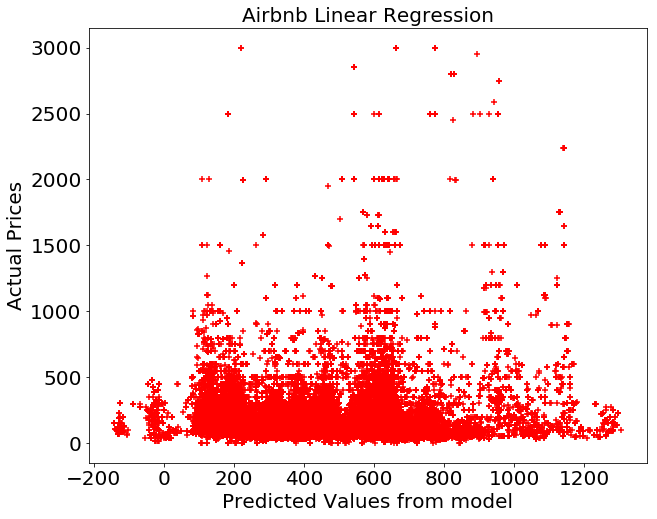

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Airbnb Linear Regression',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(Y_test['predicted'], Y_test['price'], s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from model",fontsize=20)
plt.ylabel("Actual Prices",fontsize=20)
plt.show()

In [72]:
Y_test.head()

,price,predicted,residual
30,55.0,299.055283,-244.055283
174,48.0,294.877519,-246.877519
176,47.0,297.990184,-250.990184
231,200.0,-116.628651,316.628651
289,50.0,304.261747,-254.261747


In [82]:
Y_test.drop(columns=['predicted'],inplace=True)

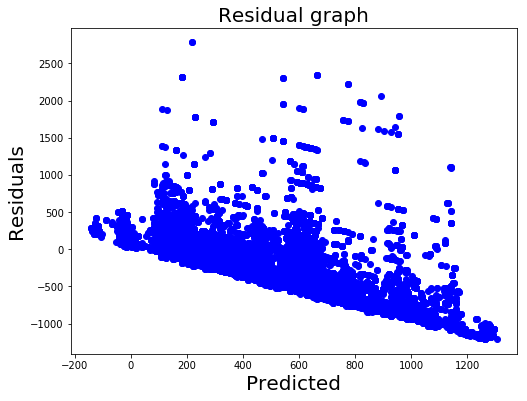

In [73]:
plt.figure('Residual v/s Predicted PTS Plot', figsize=(8,6))
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.title('Residual graph',fontsize=20)
plt.scatter(Y_test['predicted'], Y_test['residual'], color='blue', linewidth=1)
plt.show()

In [83]:
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,number_of_reviews,no_of_amenities,Distance_from_center,No_Metro_Stations
0,0,11,1,1.0,1.0,1.0,60,21,11.701910,8
1,0,11,1,1.0,1.0,1.0,42,21,11.676679,8
2,0,11,1,1.0,1.0,1.0,59,21,11.742389,8
3,0,0,0,1.0,2.0,2.0,0,7,11.704019,8
4,0,11,1,1.0,1.0,1.0,81,21,11.714633,8


In [1011]:
features = dict()
features['no of beds'] =12993202220.746763
features['no of bathrooms'] =21581787548.40421
features['bedrooms'] =20229769512.265144
features['numbeer_of_reviews'] =15379820727.127478
features['room_type'] =13841294847.56207
features['property_type'] =24972345996.719856
features['neighbourhood'] =8326695290.493888
features['No of amenities'] =16329460212.948887
features['distance from center'] =17381150706.247562
features['No_of_Metro_station'] =15565565563.961607

for key, value in sorted((value, key) for (key,value) in features.items()):
    print ("%s: %s" % (key, value))


8326695290.493888: neighbourhood
12993202220.746763: no of beds
13841294847.56207: room_type
15379820727.127478: numbeer_of_reviews
15565565563.961607: No_of_Metro_station
16329460212.948887: No of amenities
17381150706.247562: distance from center
20229769512.265144: bedrooms
21581787548.40421: no of bathrooms
24972345996.719856: property_type


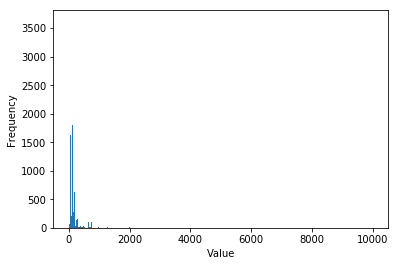

In [1048]:
plt.hist(Y_test['price'],bins=4000)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

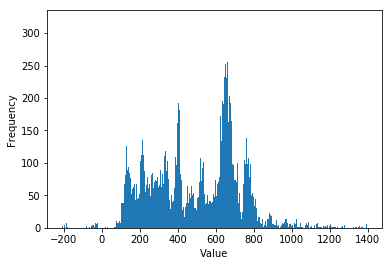

In [1047]:
plt.hist(Y_test['predicted'],bins=2000)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [1060]:
import numpy as np 
Y=Y_test.loc[Y_test['price'] < 2000]   
hist, bin_edges = np.histogram(Y, normed=True)

In [1061]:
bin_edges

array([-208.36239996,   12.37384003,  233.11008003,  453.84632003,
        674.58256002,  895.31880002, 1116.05504001, 1336.79128001,
       1557.52752001, 1778.26376   , 1999.        ])

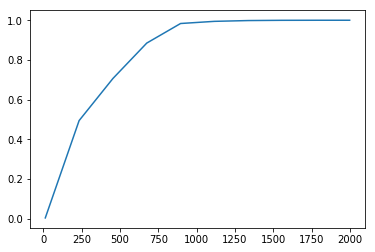

In [1062]:
dx = bin_edges[1] - bin_edges[0]
F1 = np.cumsum(hist)*dx
plt.plot(bin_edges[1:], F1)



In [1054]:
hist_predict, bin_edges_predict = np.histogram(Y_test['predicted'], normed=True)

In [1055]:
bin_edges_predict

array([-208.36239996,  -48.09873242,  112.16493512,  272.42860267,
        432.69227021,  592.95593775,  753.2196053 ,  913.48327284,
       1073.74694038, 1234.01060793, 1394.27427547])

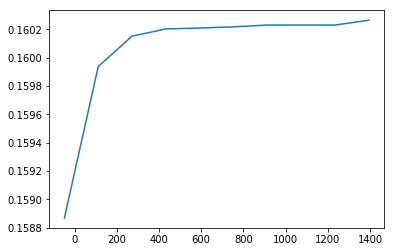

In [1056]:
dx = bin_edges_predict[1] - bin_edges_predict[0]
F2 = np.cumsum(hist)*dx
plt.plot(bin_edges_predict[1:], F2)

In [1]:
X_train.shape

NameError: name 'X_train' is not defined